In [496]:
import numpy as  np
import pandas as pd
from scipy import stats
#import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [497]:
df=pd.read_csv(r'C:\Users\duyadong\Ironhack\Week_5\Mid-project\data\raw\vgsales.csv')

In [498]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [507]:
df4=pd.read_csv(r'C:\Users\duyadong\Ironhack\Week_5\Mid-project\data\raw\vgsales-12-4-2019-short.csv')

In [508]:
df4.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [509]:
df4.shape

(55792, 16)

In [511]:
df4

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55788,55789,Lost Ember,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55789,55790,Lost Ember,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
55790,55791,Lost Ember,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0


In [499]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [500]:
df=df.dropna()
df.isnull().sum()#since there are only 271 nan,we can just drop them

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [501]:
#df.to_csv(r'C:\Users\duyadong\Ironhack\Week_5\Mid-project\data\clean\vgsales_cleaned.csv')

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [503]:
df['Year']=df['Year'].astype(int)#it makes no sense for year to be a float,so we change it into int here

C:\Users\duyadong\AppData\Local\Temp\ipykernel_7808\1525505244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].astype(int)#it makes no sense for year to be a float,so we change it into int here


In [506]:
df.to_csv(r'C:\Users\duyadong\Ironhack\Week_5\Mid-project\data\clean\vgsales_clean.csv')

In [453]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [454]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [455]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [456]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [457]:
df['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

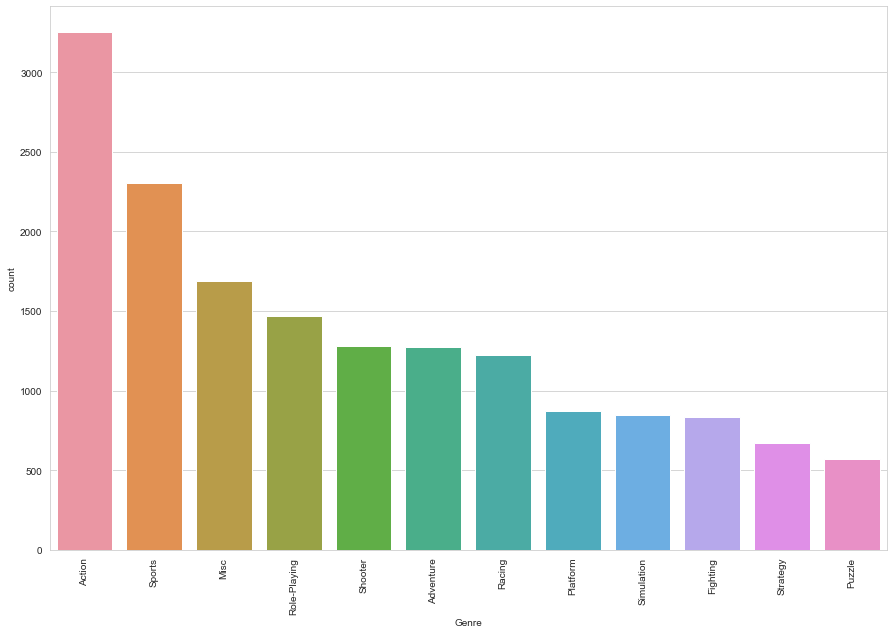

In [458]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [460]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [461]:
#first we make a copy for data wangling
df2=df.copy()
#combine for Platform
df2['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [462]:
#sns.displot(df['Platform'],aspect=2.8)
#plt.show()

In [463]:
#sns.displot(df['Year'],aspect=2.8)
#plt.show()

In [464]:
#sns.displot(df['Publisher'],aspect=2.8)
#plt.show()

In [465]:
#sns.displot(df['Genre'],aspect=2.8)
#plt.show()

In [466]:
# def combine_platform(x):
#     if ('PS2' in x):
#         return 'PS'
#     elif ('PS3' in x):
#         return 'PS'
#     elif ('PS4' in x):
#         return 'PS'
#     elif ('X360' in x):
#         return 'XBOX'
#     elif ('XB' in x):
#         return 'XBOX'
#     elif ('XOne' in x):
#         return 'XBOX'
#     elif ('WiiU' in x):
#         return 'Wii'
#     else:
#         return x

In [467]:
# df2["Platform"]=df2["Platform"].apply(combine_platform)

In [468]:
df2["Platform"] .value_counts(dropna=False)

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [469]:
#categorical.loc[categorical["education"].isin(['Master','Doctor'])] = "Post-Uni"
platform_need = df2["Platform"].value_counts().index[:14]
df2["Platform"] = np.where(df2["Platform"].isin(platform_need),df2["Platform"], 'Others')
df2["Platform"] .value_counts(dropna=False)

DS        2131
PS2       2127
Others    1505
PS3       1304
Wii       1290
X360      1234
PSP       1197
PS        1189
PC         938
XB         803
GBA        786
GC         542
3DS        499
PSV        410
PS4        336
Name: Platform, dtype: int64

In [470]:
df2["Genre"] .value_counts(dropna=False)

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [471]:
df2["Publisher"] .value_counts(dropna=False)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [472]:
publisher_need = df2["Publisher"].value_counts().index[:11]
df2["Publisher"] = np.where(df2["Publisher"].isin(publisher_need),df2["Publisher"], 'Others')
df2['Publisher'] .value_counts(dropna=False)

Others                          7807
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Capcom                           376
Name: Publisher, dtype: int64

In [473]:
correlations = df2.corr()
correlations

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


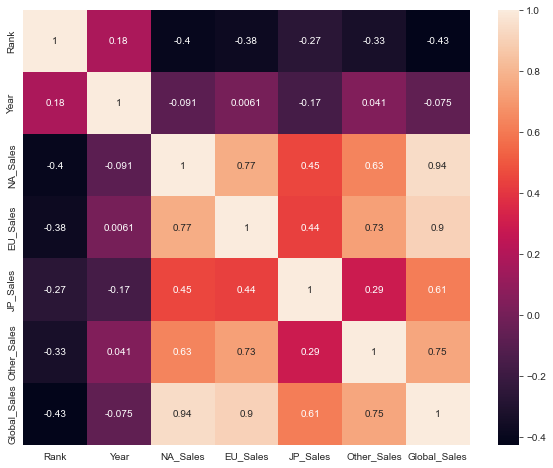

In [474]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)
plt.show()

In [475]:
y=df2['Global_Sales']
X=df2[['Platform','Publisher','Genre']]

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (13032, 3)
y_train shape is: (13032,)
X_test shape is: (3259, 3)
y_test shape is: (3259,)


In [477]:
X_train_1_hot_col = X_train[['Platform','Publisher','Genre']]
X_train_1_hot_col

,Platform,Publisher,Genre
8123,Wii,Activision,Sports
14022,Wii,Konami Digital Entertainment,Sports
1611,PS2,Konami Digital Entertainment,Platform
157,Others,Nintendo,Fighting
10614,PSP,Others,Simulation
...,...,...,...
11180,PS2,Others,Sports
7832,Others,Others,Simulation
74,DS,Nintendo,Misc
14772,DS,Konami Digital Entertainment,Action


In [478]:
X_test_1_hot_col = X_test[['Platform','Publisher','Genre']]
X_test_1_hot_col

,Platform,Publisher,Genre
15609,PC,Others,Shooter
1893,PS2,Electronic Arts,Racing
439,Others,Others,Shooter
765,PC,Others,Simulation
6721,PS2,Namco Bandai Games,Sports
...,...,...,...
12792,Others,Others,Shooter
10234,PS2,Others,Adventure
1039,PS2,Ubisoft,Role-Playing
16483,PC,Others,Strategy


In [479]:
encoder = OneHotEncoder(drop='first').fit(X_train_1_hot_col)
cols = encoder.get_feature_names(input_features = X_train_1_hot_col.columns)
X_train_col_encoded = pd.DataFrame(encoder.transform(X_train_1_hot_col).toarray(),columns=cols)
X_train_col_encoded

C:\Users\duyadong\Ironhack\Week_5\Mid-project\conda-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [480]:
cols1 = encoder.get_feature_names(input_features = X_test_1_hot_col.columns)
X_test_col_encoded = pd.DataFrame(encoder.transform( X_test_1_hot_col).toarray(),columns=cols1)
X_test_col_encoded

C:\Users\duyadong\Ironhack\Week_5\Mid-project\conda-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3256,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3257,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [481]:
from sklearn.linear_model import LinearRegression

In [482]:
def models_automation(models, X_train_col_encoded, y_train,X_test_col_encoded, y_test):
    for model in models:
        model.fit(X_train_col_encoded, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_col_encoded, y_train)}, Test -> {model.score(X_test_col_encoded, y_test)}")

In [483]:
model_list = [LinearRegression()]
models_automation(model_list, X_train_col_encoded, y_train,X_test_col_encoded, y_test)

LinearRegression: Train -> 0.11664898173974925, Test -> 0.104998807836437


In [484]:
df3=pd.concat([df2['Year'],df2[['Platform','Publisher','Genre','Global_Sales']]],axis=1)

In [485]:
df3.isna().sum()

Year            0
Platform        0
Publisher       0
Genre           0
Global_Sales    0
dtype: int64

In [430]:
y=df3['Global_Sales']
X=df3[['Platform','Publisher','Genre','Year']]

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (13032, 4)
y_train shape is: (13032,)
X_test shape is: (3259, 4)
y_test shape is: (3259,)


In [432]:
X_train_1_hot_col = X_train[['Platform','Publisher','Genre']]
X_test_1_hot_col = X_test[['Platform','Publisher','Genre']]
encoder = OneHotEncoder(drop='first').fit(X_train_1_hot_col)
cols = encoder.get_feature_names(input_features = X_train_1_hot_col.columns)
X_train_col_encoded = pd.DataFrame(encoder.transform(X_train_1_hot_col).toarray(),columns=cols)
cols1 = encoder.get_feature_names(input_features = X_test_1_hot_col.columns)
X_test_col_encoded = pd.DataFrame(encoder.transform( X_test_1_hot_col).toarray(),columns=cols1)

C:\Users\duyadong\Ironhack\Week_5\Mid-project\conda-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\duyadong\Ironhack\Week_5\Mid-project\conda-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [433]:
X_train=X_train.reset_index()
X_train=X_train.drop('index',axis=1)

In [434]:
X__newtrain_encoded=pd.concat([X_train['Year'],X_train_col_encoded],axis=1)
X__newtrain_encoded=X__newtrain_encoded.reset_index()
X__newtrain_encoded=X__newtrain_encoded.drop('index',axis=1)

In [435]:
X__newtrain_encoded=pd.concat([X_train['Year'],X_train_col_encoded],axis=1)
X__newtrain_encoded=X__newtrain_encoded.reset_index()
X__newtrain_encoded=X__newtrain_encoded.drop('index',axis=1)

In [486]:
X__newtrain_encoded

,Year,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13027,2005,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13028,2015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13029,2007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13030,2006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [438]:
X_test=X_test.reset_index()
X_test=X_test.drop('index',axis=1)

In [439]:
X__newtest_encoded=pd.concat([X_test['Year'],X_test_col_encoded],axis=1)
X__newtest_encoded=X__newtest_encoded.reset_index()
X__newtest_encoded=X__newtest_encoded.drop('index',axis=1)

In [440]:
X__newtest_encoded=pd.concat([X_test['Year'],X_test_col_encoded],axis=1)
X__newtest_encoded=X__newtest_encoded.reset_index()
X__newtest_encoded=X__newtest_encoded.drop('index',axis=1)

In [441]:
X__newtest_encoded

,Year,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1992,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,1995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3255,2007,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3256,2003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3257,2007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [487]:
transformer = MinMaxScaler().fit(X__newtrain_encoded)

In [492]:
X_norm1 = transformer.transform(X__newtrain_encoded)
X_train_scaled = pd.DataFrame(X_norm1, columns=X__newtrain_encoded.columns)
X_train_scaled = X_train_scaled.reset_index()
X_train_scaled=X_train_scaled.drop('index',axis=1)
X_train_scaled

,Year,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.756757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.783784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.567568,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.513514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.810811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13027,0.675676,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13028,0.945946,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13029,0.729730,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13030,0.702703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [493]:
X_norm2 = transformer.transform(X__newtest_encoded)
X_test_scaled = pd.DataFrame(X_norm2, columns=X__newtest_encoded.columns)
X_test_scaled= X_test_scaled.reset_index()
X_test_scaled=X_test_scaled.drop('index',axis=1)
X_test_scaled

,Year,Platform_DS,Platform_GBA,Platform_GC,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.837838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.621622,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.918919,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.324324,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.594595,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0.405405,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3255,0.729730,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3256,0.621622,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3257,0.729730,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [494]:
def models_automation2(models, X_train_scaled, y_train,X_test_scaled, y_test):
    for model in models:
        model.fit(X_train_scaled,y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

In [495]:
model_list = [LinearRegression()]
models_automation(model_list, X_train_col_encoded, y_train,X_test_col_encoded, y_test)

LinearRegression: Train -> 0.11664898173974925, Test -> 0.104998807836437
